## Anomaly Detection using machine learning
for this I'll be using One Class SVM Model and isolation Forest for the prediction, where Isolation forest has higher accuracy in prediction..
as I observed The One-Class SVM model has different performance characteristics compared to the Isolation Forest model. While the precision for detecting normal points (False) remains high, the recall for anomalies (True) is low, indicating that the model struggles to correctly identify anomalies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [2]:
#the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Let's first train the Isolation Forest Model...

In [3]:
# Preparing the training data
X_train = train_data[['value', 'predicted']]
y_train = train_data['is_anomaly']

In [4]:
# Training the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [5]:
# Making predictions on the training data
train_data['iso_anomaly_prediction'] = iso_forest.predict(X_train)
train_data['iso_anomaly_prediction'] = train_data['iso_anomaly_prediction'].apply(lambda x: 1 if x == -1 else 0)


In [6]:
# Evaluation of the Isolation Forest model
iso_report = classification_report(y_train, train_data['iso_anomaly_prediction'])


### Here is the One Class SVM Model training..

In [7]:
# Preparing the test data
X_test = test_data[['value', 'predicted']]
test_data['iso_anomaly_prediction'] = iso_forest.predict(X_test)
test_data['iso_anomaly_prediction'] = test_data['iso_anomaly_prediction'].apply(lambda x: 1 if x == -1 else 0)


In [8]:
# Training the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)
one_class_svm.fit(X_train)


OneClassSVM(gamma=0.1, nu=0.05)

In [9]:
# Making predictions on the training data
train_data['svm_anomaly_prediction'] = one_class_svm.predict(X_train)
train_data['svm_anomaly_prediction'] = train_data['svm_anomaly_prediction'].apply(lambda x: 1 if x == -1 else 0)


In [10]:
# Evaluation of the One-Class SVM model
svm_report = classification_report(y_train, train_data['svm_anomaly_prediction'])


In [11]:
# Making predictions on the test data
test_data['svm_anomaly_prediction'] = one_class_svm.predict(X_test)
test_data['svm_anomaly_prediction'] = test_data['svm_anomaly_prediction'].apply(lambda x: 1 if x == -1 else 0)


In [12]:
# Output results
print("Isolation Forest Classification Report:")
print(iso_report)
print("\nOne-Class SVM Classification Report:")
print(svm_report)

Isolation Forest Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96     15054
        True       0.27      0.27      0.27       776

    accuracy                           0.93     15830
   macro avg       0.62      0.62      0.62     15830
weighted avg       0.93      0.93      0.93     15830


One-Class SVM Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.60      0.73     15054
        True       0.04      0.32      0.07       776

    accuracy                           0.59     15830
   macro avg       0.49      0.46      0.40     15830
weighted avg       0.90      0.59      0.70     15830



In [13]:
# Saving the predictions to CSV files
train_data.to_csv('train_predictions.csv', index=False)
test_data.to_csv('test_predictions.csv', index=False)

In [14]:
# Visualization
def plot_anomalies(data, title, anomaly_col):
    plt.figure(figsize=(14, 6))
    sns.scatterplot(data=data, x='timestamp', y='value', hue=anomaly_col, palette={0: 'blue', 1: 'red'}, legend='brief')
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend(title='Anomaly', loc='upper right')
    plt.show()

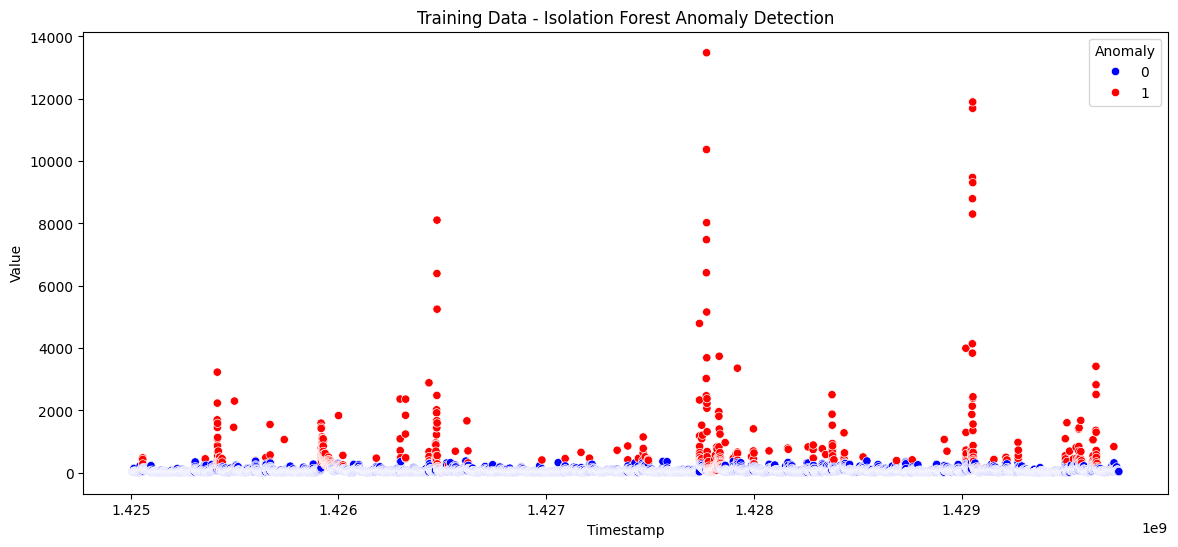

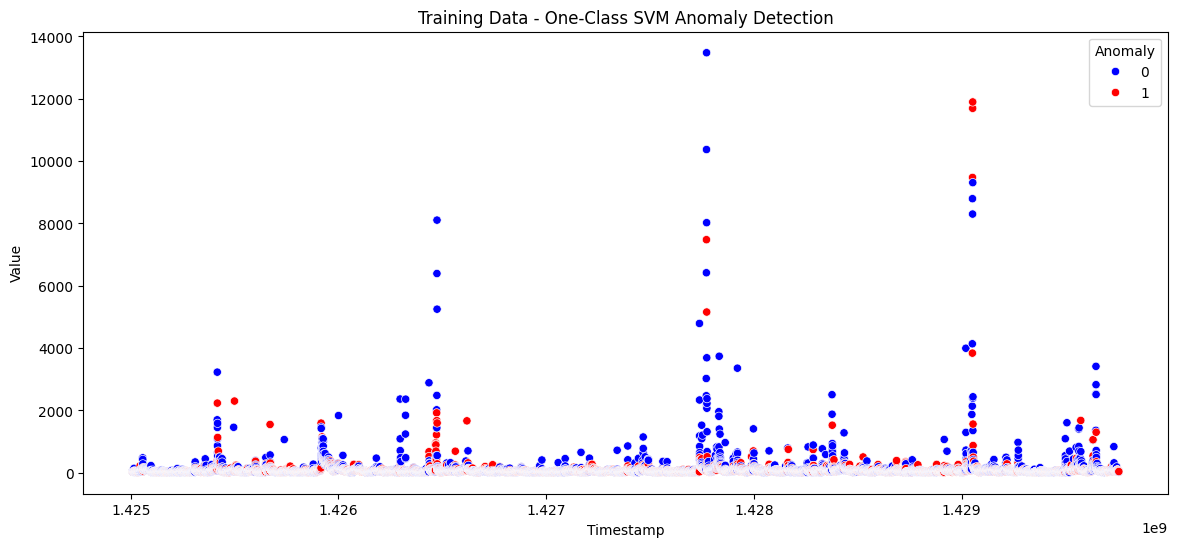

In [15]:
# Plotting the results
plot_anomalies(train_data, 'Training Data - Isolation Forest Anomaly Detection', 'iso_anomaly_prediction')
plot_anomalies(train_data, 'Training Data - One-Class SVM Anomaly Detection', 'svm_anomaly_prediction')


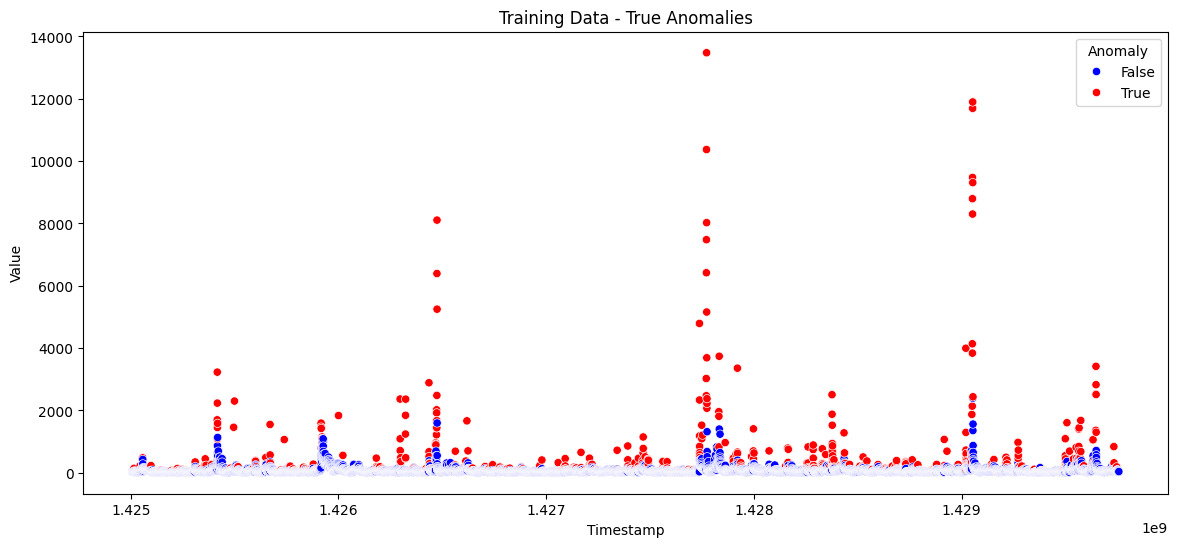

In [16]:
# Plotting true anomalies
plt.figure(figsize=(14, 6))
sns.scatterplot(data=train_data, x='timestamp', y='value', hue='is_anomaly', palette={0: 'blue', 1: 'red'}, legend='brief')
plt.title('Training Data - True Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend(title='Anomaly', loc='upper right')
plt.show()